In [27]:
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap, TSNE

# Dimensionality Reduction Demo

Iris Data

In [29]:
iris_data, iris_labels = load_iris()["data"], load_iris()["target"]

Income Data

In [30]:
income_data_columns = ["age", "workclass", "fnlwgt", "education", "education-num", "material-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income_class"]
scalar = MinMaxScaler()

income_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income_data.columns = income_data_columns
income_data = pd.get_dummies(income_data)
income_data = scalar.fit_transform(income_data)

income_data_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', sep=", ", engine="python", header=None, skiprows=1)
income_data_test.columns = income_data_columns
income_data_test = pd.get_dummies(income_data_test)
income_data_test = scalar.fit_transform(income_data_test)

## Principal Component Analysis (PCA)

In [31]:
iris_pca = PCA()
iris_data_transformed = iris_pca.fit_transform(iris_data)

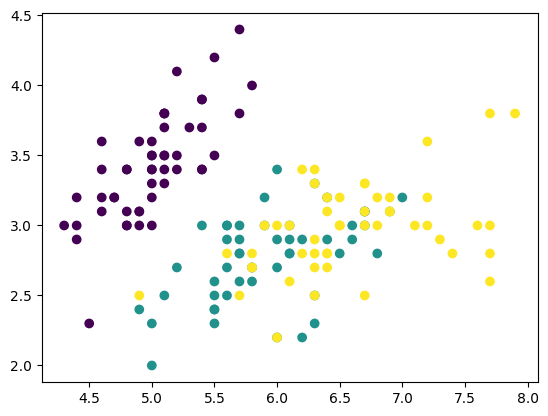

In [32]:
plt.scatter(iris_data[:, 0], iris_data[:, 1], c = iris_labels)


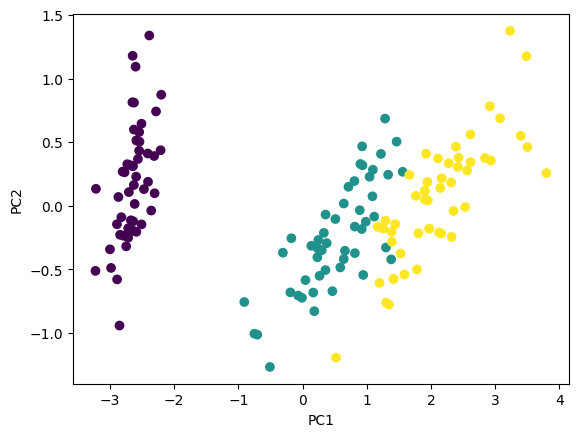

In [33]:
plt.scatter(iris_data_transformed[:, 0], iris_data_transformed[:, 1], c = iris_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [34]:
iris_pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [35]:
explained_variance_ratio = iris_pca.explained_variance_ratio_
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

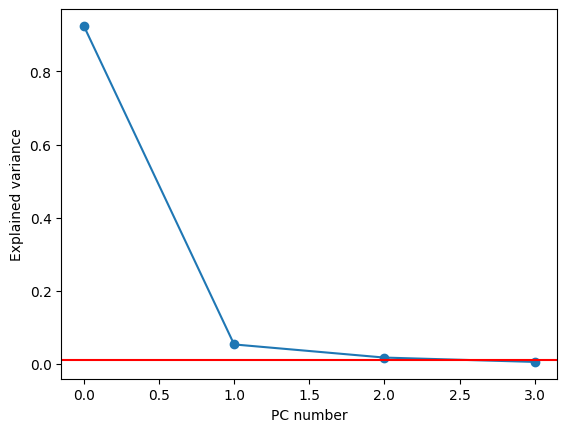

In [36]:
plt.plot(explained_variance_ratio, marker = "o")
plt.axhline(0.01, c ="r")
plt.xlabel("PC number")
plt.ylabel("Explained variance")
plt.show()

In [37]:
total_explained_variance = np.cumsum(explained_variance_ratio)
total_explained_variance

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

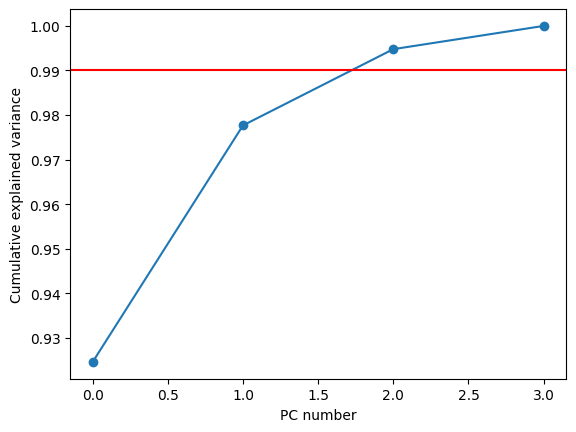

In [38]:
plt.plot(total_explained_variance , marker = "o")
plt.axhline(0.99, c ="r")
plt.xlabel("PC number")
plt.ylabel("Cumulative explained variance")
plt.show()

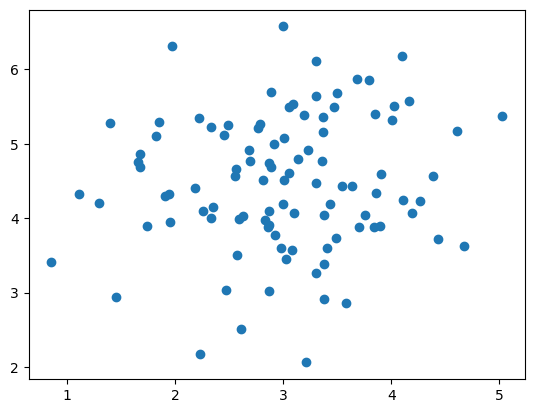

In [39]:
blob, _ = make_blobs(centers=[[3, 4.5]])
plt.scatter(blob[:, 0], blob[:, 1])

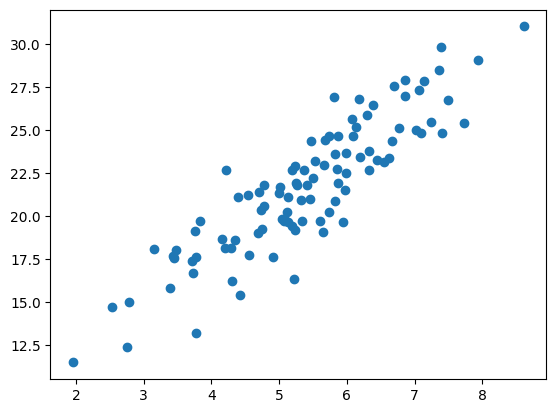

In [40]:
blob = blob @ np.array([[1.5, 3.5], [0.2, 2.5]])
plt.scatter(blob[:, 0], blob[:, 1])

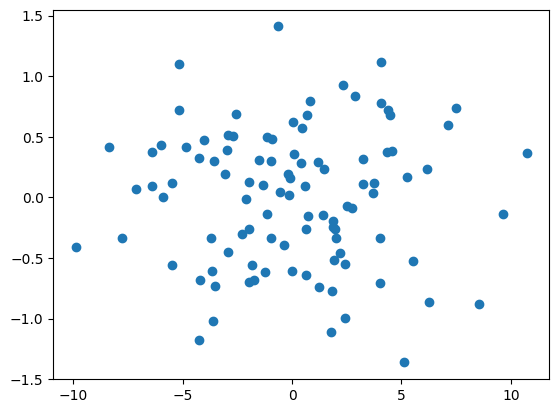

In [41]:
blob_pca = PCA()
blob_pcs = blob_pca.fit_transform(blob)
plt.scatter(blob_pcs[:, 0], blob_pcs[:, 1])

In [42]:
blob_pca.components_

array([[-0.28661596, -0.95804556],
       [-0.95804556,  0.28661596]])

In [43]:
blob_pca.mean_

array([ 5.3880417 , 21.67835966])

In [44]:
np.linalg.eig(np.corrcoef(blob[:, 0], blob[:, 1]))

EigResult(eigenvalues=array([1.88842071, 0.11157929]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

In [45]:
blob_pca.explained_variance_ratio_

array([0.9810105, 0.0189895])

In [46]:
blob_pca.get_covariance()

array([[ 1.62974193,  4.39220729],
       [ 4.39220729, 14.99717542]])

## Kernel PCA

In [47]:
iris_kernel_pca = KernelPCA(n_components=5, kernel="rbf", gamma=0.5)
iris_kernel_pca.fit_transform(iris_data)

array([[ 8.06112254e-01, -8.52788993e-03, -1.18737536e-01,
         1.08364653e-01, -6.91402230e-03],
       [ 7.53590419e-01, -1.21295370e-02, -8.42755705e-02,
        -3.38324777e-01,  2.16023879e-02],
       [ 7.62928489e-01, -4.98405269e-03, -9.95218340e-02,
        -3.48600269e-01,  2.95851945e-02],
       [ 7.34588906e-01, -1.10647265e-02, -7.51214164e-02,
        -4.33731930e-01,  2.91164582e-02],
       [ 8.00501098e-01, -6.37606808e-03, -1.18826700e-01,
         1.10380991e-01, -5.37584935e-03],
       [ 6.72756564e-01, -1.23732831e-02, -4.97419778e-02,
         5.25868249e-01, -3.87305110e-02],
       [ 7.59626800e-01, -5.99222697e-03, -9.74326260e-02,
        -2.65641495e-01,  2.21780862e-02],
       [ 8.12578437e-01, -1.35736415e-02, -1.15016819e-01,
        -1.86578285e-02, -1.69741065e-03],
       [ 6.37325464e-01, -3.47022381e-03, -3.44313862e-02,
        -5.78394745e-01,  4.52794328e-02],
       [ 7.70947893e-01, -1.39890297e-02, -9.15754746e-02,
        -2.80330488e-01

## Linear Discriminant Analysis (LinDA)

In [48]:
linda = LinearDiscriminantAnalysis()
linda.fit(iris_data, iris_labels)

LinearDiscriminantAnalysis()

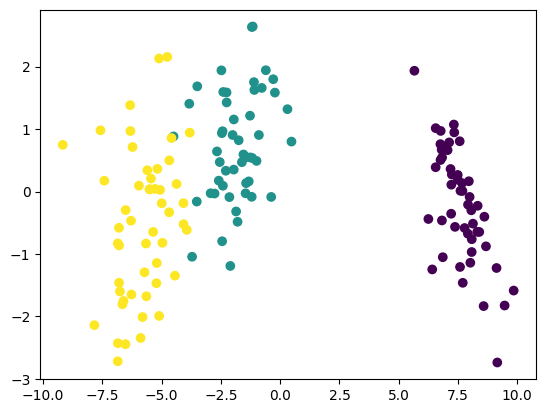

In [49]:
iris_data_linda = linda.transform(iris_data)
plt.scatter(iris_data_linda[:, 0], iris_data_linda[:, 1], c = iris_labels)

---

## Manifold Learning

### Isometric Mapping

In [50]:
isomap = Isomap(n_neighbors = 5, n_components = 2)
iris_data_isomap = isomap.fit_transform(iris_data)

c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


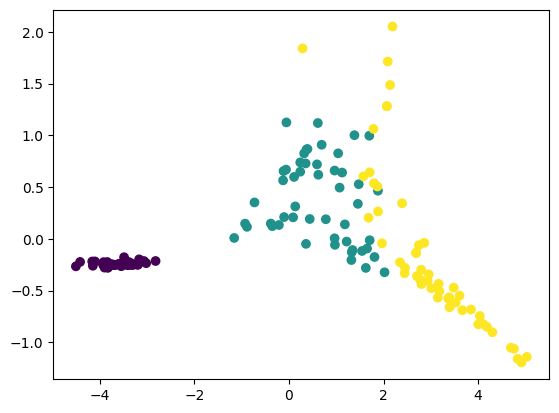

In [51]:
plt.scatter(iris_data_isomap[:, 0], iris_data_isomap[:, 1], c = iris_labels)

In [54]:
income_isomap = Isomap(n_components=10, n_neighbors=5)
income_isomap.fit(income_data[:1000])

Isomap(n_components=10)

In [55]:
income_isomap_transformed = income_isomap.transform(income_data[:1000])

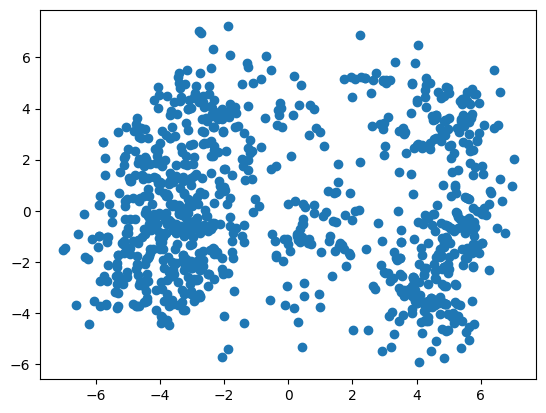

In [56]:
plt.scatter(income_isomap_transformed[:, 0], income_isomap_transformed[:, 1])

### TSNE

In [63]:
iris_tsne = TSNE( init="pca" )
iris_tsne_data = iris_tsne.fit_transform(iris_data)

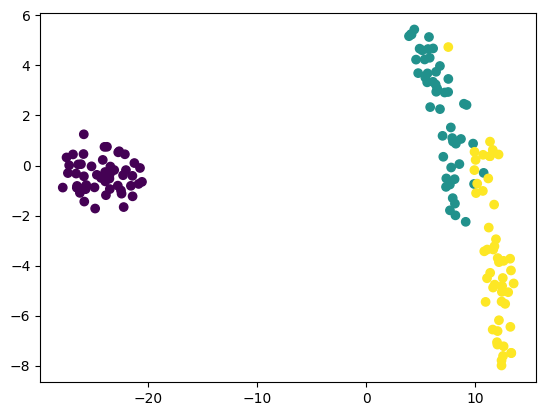

In [64]:
plt.scatter(iris_tsne_data[:, 0], iris_tsne_data[:, 1], c=iris_labels)